In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir="dataset/tarp2"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 1021 images belonging to 2 classes.


In [3]:
classes

['Danger', 'Not Danger']

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [5]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [6]:
history = model.fit(train_ds,epochs= 10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 40s 1s/step - loss: 0.5204 - accuracy: 0.7777
Epoch 2/10
32/32 [==============================] - 38s 1s/step - loss: 0.3192 - accuracy: 0.8737
Epoch 3/10
32/32 [==============================] - 38s 1s/step - loss: 0.1843 - accuracy: 0.9226
Epoch 4/10
32/32 [==============================] - 37s 1s/step - loss: 0.1255 - accuracy: 0.9432
Epoch 5/10
32/32 [==============================] - 37s 1s/step - loss: 0.1064 - accuracy: 0.9598
Epoch 6/10
32/32 [==============================] - 37s 1s/step - loss: 0.0772 - accuracy: 0.9716
Epoch 7/10
32/32 [==============================] - 37s 1s/step - loss: 0.0564 - accuracy: 0.9745
Epoch 8/10
32/32 [==============================] - 37s 1s/step - loss: 0.0571 - accuracy: 0.9775
Epoch 9/10
32/32 [==============================] - 37s 1s/step - loss: 0.0665 - accuracy: 0.9696
Epoch 10/10
32/32 [==============================] - 37s 1s/step - loss: 0.0370 - accuracy: 0.9912


In [7]:
# save the model to disk
model.save('models/my_model_final_7.h5')

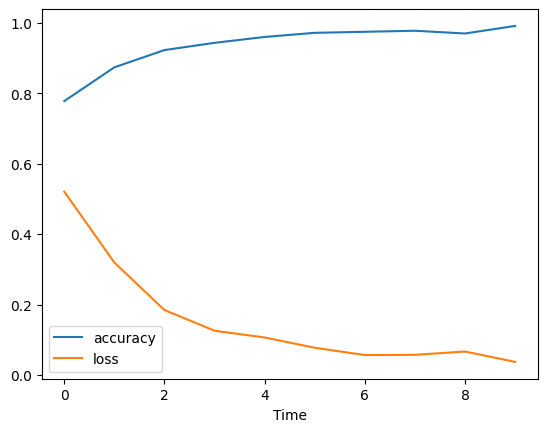

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [10]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

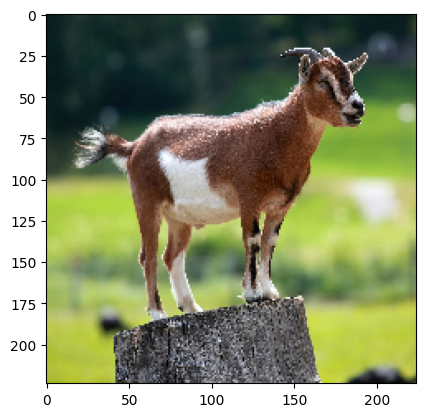

1/1 [==============================] - 0s 167ms/step
Actual: goat2.jpg
Predicted: Not Danger


In [11]:
predict_image("dataset/test/goat2.jpg")

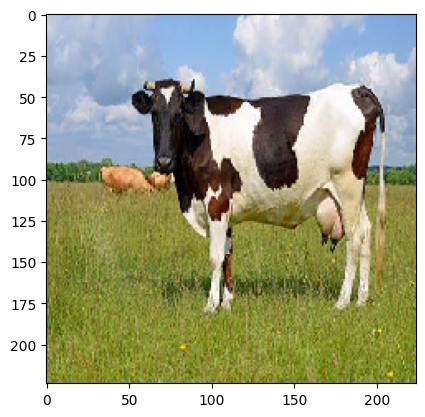

1/1 [==============================] - 0s 31ms/step
Actual: cow.jpeg
Predicted: Not Danger


In [12]:
predict_image("dataset/test/cow.jpeg")

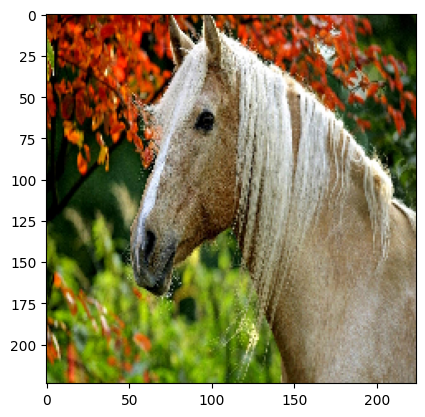

1/1 [==============================] - 0s 30ms/step
Actual: horse.jpg
Predicted: Not Danger


In [13]:
predict_image("dataset/test/horse.jpg")

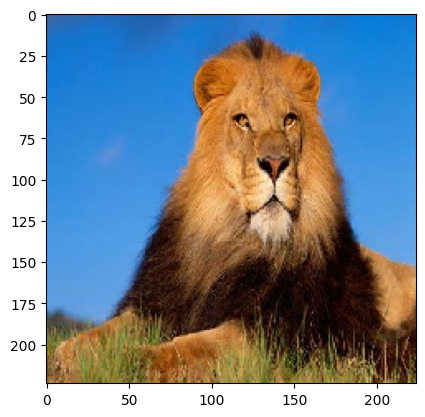

1/1 [==============================] - 0s 43ms/step
Actual: lion.jpeg
Predicted: Not Danger


In [14]:
predict_image("dataset/test/lion.jpeg")

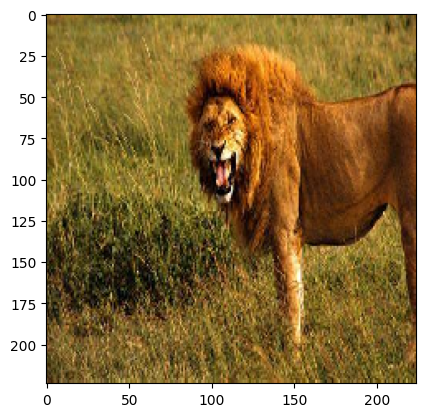

1/1 [==============================] - 0s 30ms/step
Actual: lion2.jpeg
Predicted: Danger


In [15]:
predict_image("dataset/test/lion2.jpeg")

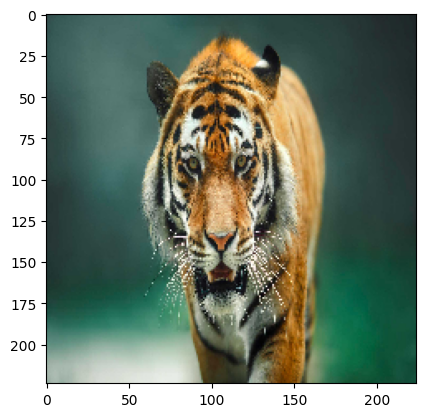

1/1 [==============================] - 0s 33ms/step
Actual: bengal-tiger.jpg
Predicted: Danger


In [16]:
predict_image("dataset/test/bengal-tiger.jpg")

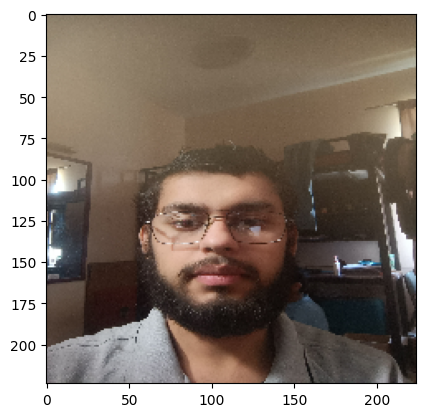

1/1 [==============================] - 0s 45ms/step
Actual: sumit1.jpg
Predicted: Danger


In [18]:
predict_image("dataset/test/sumit1.jpg")

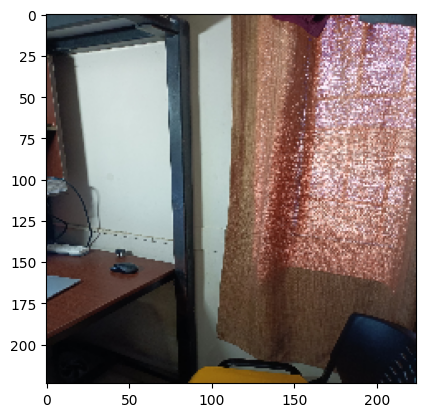

1/1 [==============================] - 0s 39ms/step
Actual: nor.jpg
Predicted: Not Danger


In [20]:
predict_image("dataset/test/nor.jpg")